# Cancer Data

This is a learning notebook. Many of the things you will see here, were based on learning from the work of the user "GUHBRANDAO" and his/her notebook can be found here:

https://www.kaggle.com/code/guhbrandao/cancer-classification-97-accuracy

One thing that I did differently was also train the model in tensor flow. You can look that up as well.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
# Let's check if there are duplicates
def duplicates_in_columns(df, column):
    print(len(df[column])-len(df[column].drop_duplicates()))

In [5]:
for column in df.columns:
    duplicates_in_columns(df, column)

0
567
113
90
47
30
95
32
32
27
137
70
29
50
36
41
22
28
36
62
71
24
112
58
55
25
158
40
30
77
69
34
568


In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
# Create a labels (y) 
labels = df['diagnosis'].astype('category').cat.codes
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int8

In [9]:
# We don't care about id and we want to remove diagnosis since
# that is a label. In addition, I am removing the Unnamed column.
features = df
features = features.drop(columns=['diagnosis'], axis=1)
features = features.drop(columns=['id'], axis=1)
features = features.drop(columns=['Unnamed: 32'], axis=1)
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
features, labels

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      compactness_mean  concavity_mean  concave po

In [11]:
# Let's split the data into training and test datasets. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.33, random_state=42)

In [12]:
#Let's recreate a model to fit on the training data and evaluate on the testing data.

#Set random seed
tf.random.set_seed(42)

#1. Create the model (same as model_7)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

#2. Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

In [13]:
#3. Fit the model
history = model_1.fit(X_train, y_train, epochs = 50)

Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 117.7532 - accuracy: 0.3806
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 6.6187 - accuracy: 0.5617
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 1.4946 - accuracy: 0.5774
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.8085 - accuracy: 0.8241
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8766
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8740
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8819
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8845
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8845
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8898
Epoch 11/50
12/12

In [14]:
#4. evaluate the model on the test dataset
model_1.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9628


[0.143894225358963, 0.9627659320831299]

With this method, I 

In [15]:
#Let's recreate a model to fit on the training data and evaluate on the testing data.

#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  #tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

#2. Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. Fit the model
history = model_2.fit(X_train, y_train, epochs = 50)

#4. evaluate the model on the test dataset
model_2.evaluate(X_test, y_test)

Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 1.4579 - accuracy: 0.6194
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.6194
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6194
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6194
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.6194
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6194
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.6194
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6194
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6194
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6194
Epoch 11/50
12/12 [

[0.6521329879760742, 0.6436170339584351]

In [16]:
# Let's split the data into training and test datasets. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state=42)

#Let's recreate a model to fit on the training data and evaluate on the testing data.

#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  #tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

#2. Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. Fit the model
history = model_3.fit(X_train, y_train, epochs = 50)

#4. evaluate the model on the test dataset
model_3.evaluate(X_test, y_test)

Epoch 1/50
11/11 [==============================] - 1s 3ms/step - loss: 112.7278 - accuracy: 0.5777
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 29.8964 - accuracy: 0.3900
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 6.1785 - accuracy: 0.7126
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 3.1006 - accuracy: 0.6628
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 1.3028 - accuracy: 0.8416
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 0.9418 - accuracy: 0.8416
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7817 - accuracy: 0.8680
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8929 - accuracy: 0.8651
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7754 - accuracy: 0.8592
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.8651
Epoch 11/50
11/1

[0.2511483132839203, 0.8991228342056274]

We observe that by changing the test size to 40 percent, we actually get better accuracy. Interesting!

In [17]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int8

In [18]:
# Let's split the data into training and test datasets. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state=42)

#Let's recreate a model to fit on the training data and evaluate on the testing data.

#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  #tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

#2. Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. Fit the model
history = model_3.fit(X_train, y_train, epochs = 50)

#4. evaluate the model on the test dataset
model_3.evaluate(X_test, y_test)

Epoch 1/50
11/11 [==============================] - 1s 3ms/step - loss: 97.7270 - accuracy: 0.6129
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 15.2022 - accuracy: 0.3636
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 8.5724 - accuracy: 0.3871
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 1.2291 - accuracy: 0.5455
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.6129
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.6129
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.6129
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6129
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6129
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6129
Epoch 11/50
11/11

[0.6506909728050232, 0.6491228342056274]

In [19]:
# Draw a pie chart to show how many 
print(len(df['diagnosis'] == 'M'))
print(len(df['diagnosis'] == 'B'))

569
569


In [20]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

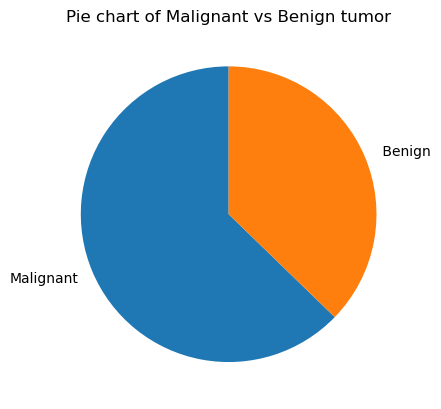

In [21]:
# Let's draw a pie chart
labels = ['Malignant',' Benign']
sizes = np.asarray(df['diagnosis'].value_counts())
fig,ax = plt.subplots()
plt.title('Pie chart of Malignant vs Benign tumor')
ax.pie(sizes, labels=labels, startangle=90)
plt.show()

In [22]:
def scatter_plot_compare(df, column1, column2):
    M = df[df['diagnosis'] == 'M'] #Diagnosis transfers all values of M to M data
    B = df[df['diagnosis'] == 'B'] #Diagnosis transfers all values of B to B data

    plt.scatter(M[column1],M[column2], label = "Malignant", alpha = 0.3)
    plt.scatter(B[column1],B[column2],label = "Benign", alpha = 0.3)

    plt.xlabel("radius_mean")
    plt.ylabel("texture_mean")

    plt.legend()
    plt.show()

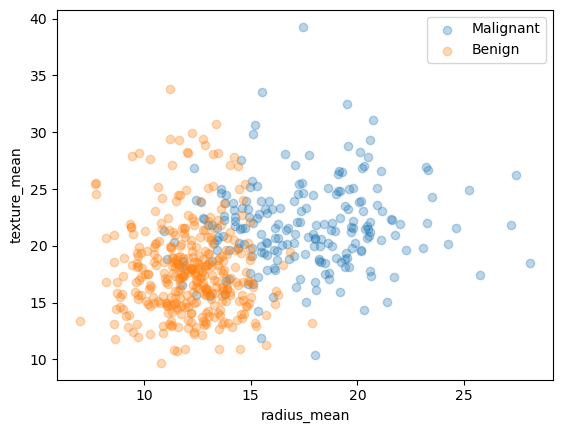

In [23]:
scatter_plot_compare(df, 'radius_mean', 'texture_mean')

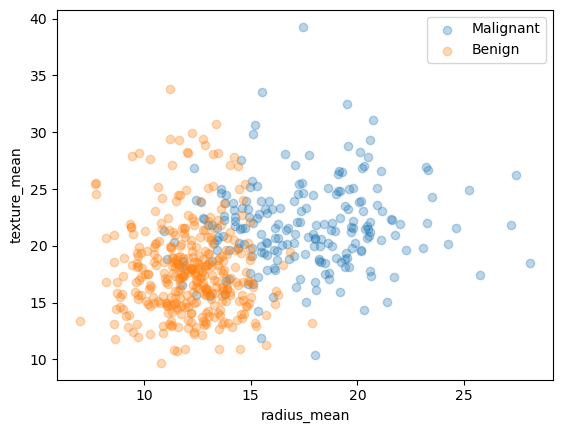

In [24]:
scatter_plot_compare(df, 'radius_mean', 'texture_mean')

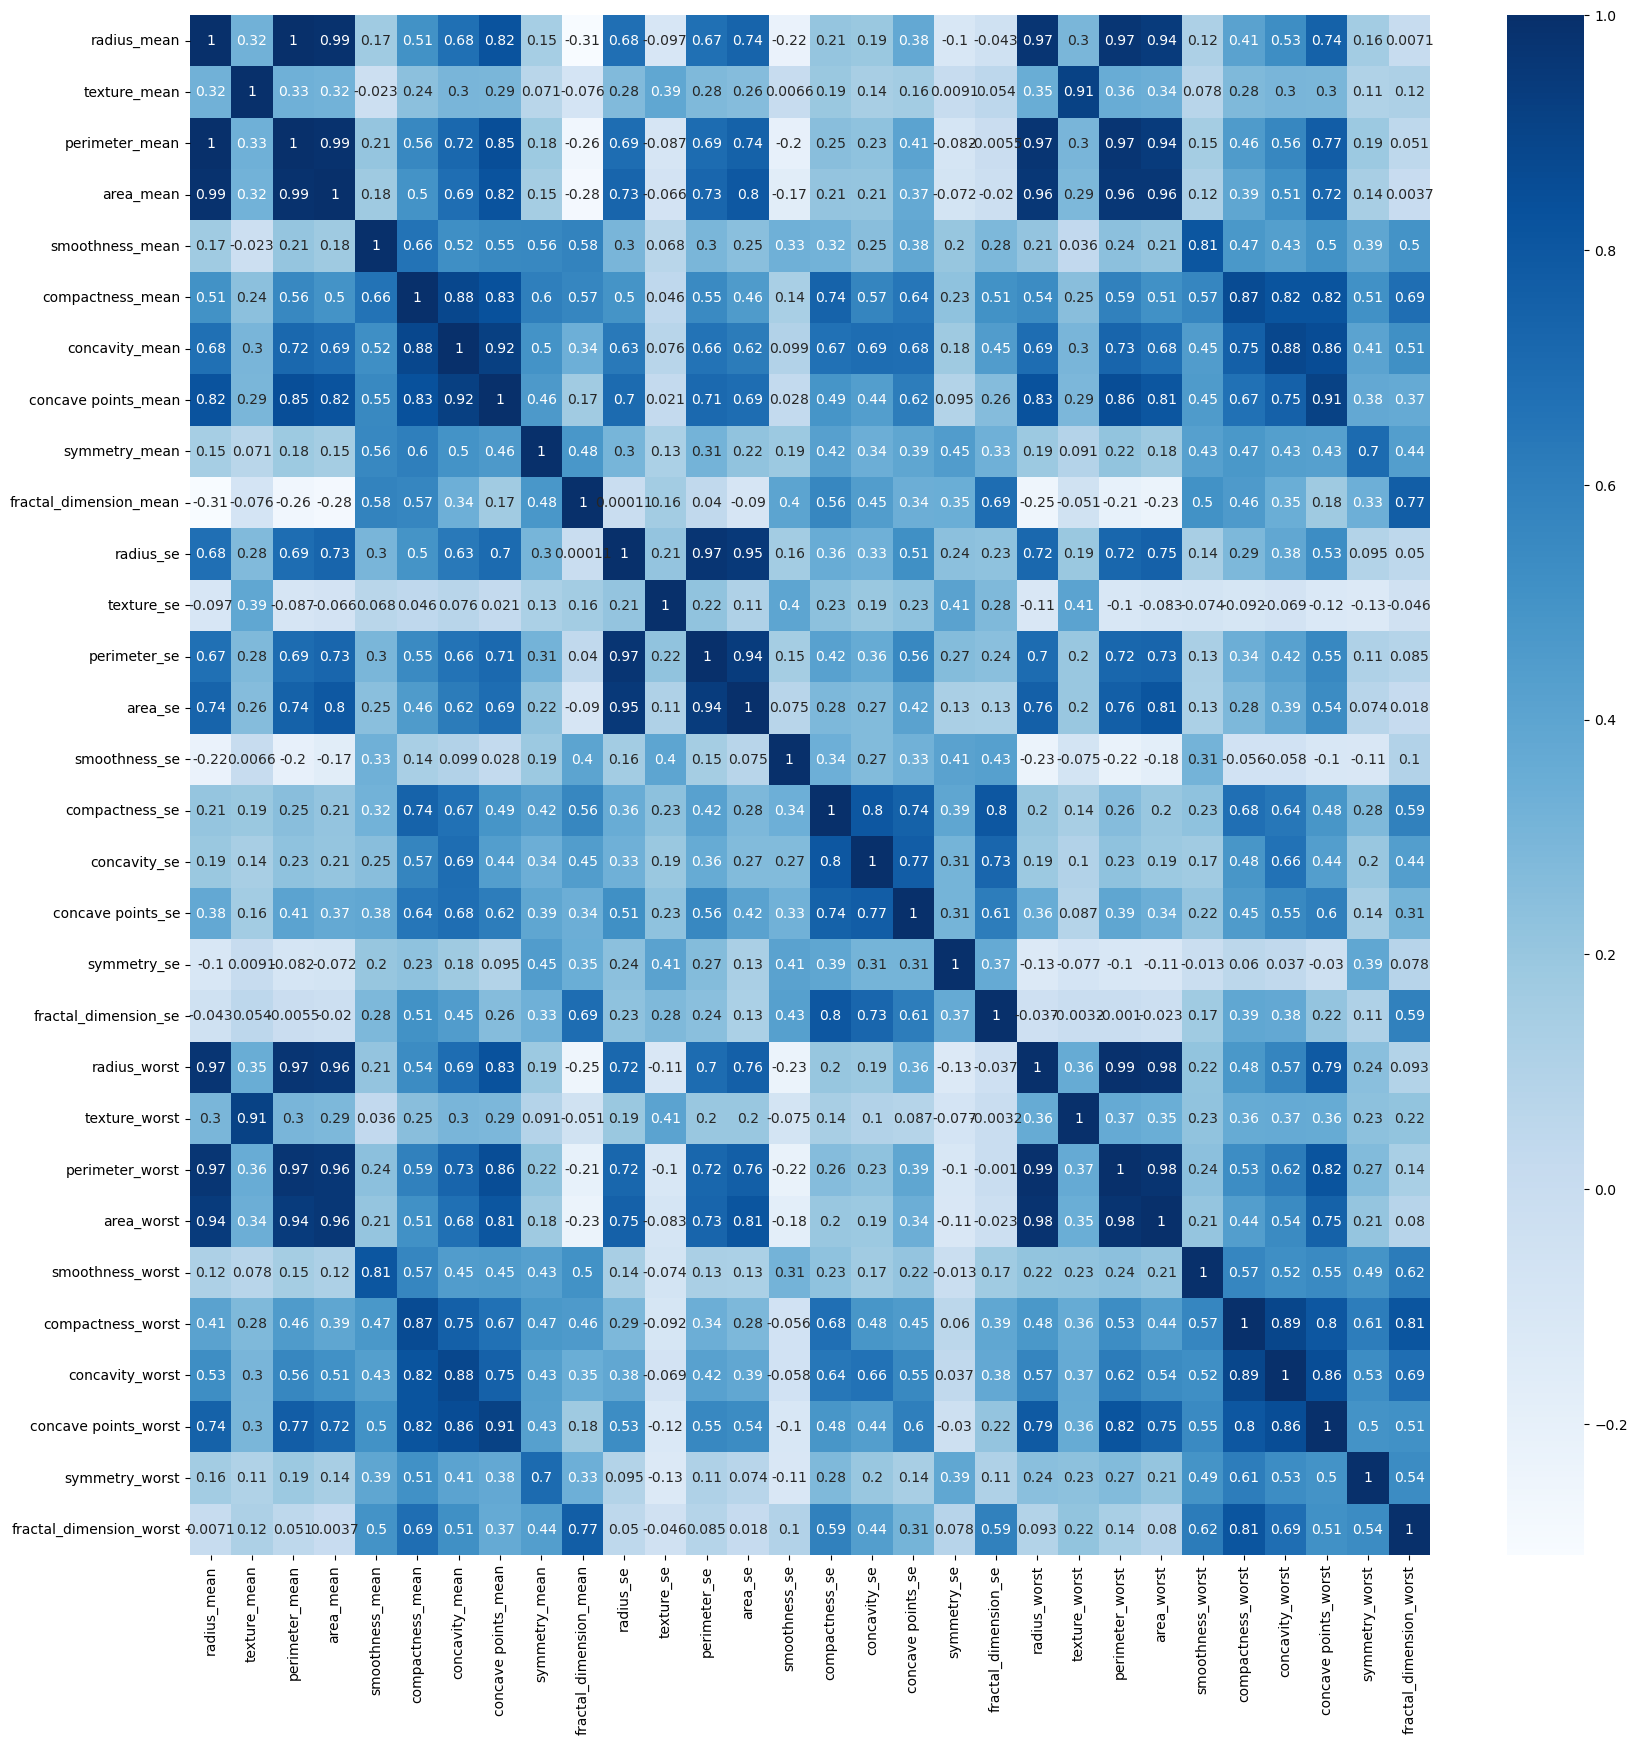

In [25]:
# Import seaborn
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(features.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from scipy.stats import expon, uniform

In [27]:
model_dict = {}

In [28]:
# Naive Bayes
# 1. We are using the Gaussian Naive Bayes classifier
classifer = GaussianNB()
# 2. Fit the model to the training data.
predictor = classifer.fit(X_train, y_train)
# 3. Now that we have model, we are predicting the results 
#    of the model on the test data.
y_pred = predictor.predict(X_test)
# 4. Calculate accuracy.
accuracy_naive_bayes = accuracy_score(y_test, y_pred)
model_dict['naive_bayes'] = accuracy_naive_bayes
print(accuracy_naive_bayes)

0.9517543859649122


In [29]:
# Linear Discriminant Analysis
# 1. We are using the Linear Discriminant Analysis classifier
classifer = LinearDiscriminantAnalysis()
# 2. Fit the model to the training data.
predictor = classifer.fit(X_train, y_train)
# 3. Now that we have model, we are predicting the results 
#    of the model on the test data.
y_pred = predictor.predict(X_test)
# 4. Calculate accuracy.
accuracy_lda = accuracy_score(y_test, y_pred)
model_dict['linear_discriminant_analysis'] = accuracy_lda
print(accuracy_lda)

0.9605263157894737


In [30]:
# Logisitc Regression
# 1. We are using the Logistic Regression
classifer = LogisticRegression()
# 2. Fit the model to the training data.
predictor = classifer.fit(X_train, y_train)
# 3. Now that we have model, we are predicting the results 
#    of the model on the test data.
y_pred = predictor.predict(X_test)
# 4. Calculate accuracy.
accuracy_log_reg = accuracy_score(y_test, y_pred)
model_dict['logistic_regression'] = accuracy_log_reg
print(accuracy_log_reg)

0.9692982456140351


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
# Support Vector Classifier
classifier = SVC(random_state=42)
predictor_svc = classifier.fit(X_train, y_train)
y_pred = predictor_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)
model_dict['SVC'] = accuracy_svc
print(accuracy_svc)

0.9429824561403509


In [32]:
# Kneighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
model_dict['kneighbors_classifier'] = accuracy_knn
print(accuracy_knn)

0.956140350877193


In [33]:
#Stochastic Gradient Descent Classifier
classifier = SGDClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_sgdc = accuracy_score(y_test, y_pred)
model_dict['sgd_classifier'] = accuracy_sgdc
print(accuracy_sgdc)

0.6359649122807017


In [34]:
#Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
model_dict['random_forest_classifier'] = accuracy_rfc
print(accuracy_rfc)

0.9692982456140351


In [35]:
classifier = GradientBoostingClassifier(random_state=42)
predictor_gbc = classifier.fit(X_train, y_train)
y_pred = predictor_gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred)
model_dict['gradient_boosting_classifier'] = accuracy_gbc
print(accuracy_gbc)

0.9605263157894737


In [36]:
#xboost
classifier = XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = classifier.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
model_dict['xgboost_classifier'] = accuracy_xgb
print(accuracy_xgb)

0.9736842105263158


In [37]:
#adboost
dtc=DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier = AdaBoostClassifier(dtc,random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred)
model_dict['adaboost_classifier'] = accuracy_ada
print(accuracy_ada)

0.956140350877193


In [38]:
#lgbm
classifier = LGBMClassifier(random_state=42)
predictor_lgbm = classifier.fit(X_train, y_train)
y_pred = predictor_lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred)
model_dict['lgbm_classifier'] = accuracy_lgbm
print(accuracy_lgbm)

0.9429824561403509


In [39]:
# extra trees
classifier = ExtraTreesClassifier(random_state=42)
predictor_etc = classifier.fit(X_train, y_train)
y_pred = predictor_etc.predict(X_test)
accuracy_etc = accuracy_score(y_test, y_pred)
model_dict['etc_classifier'] = accuracy_etc
print(accuracy_etc)

0.9736842105263158


In [40]:
model_dict

{'naive_bayes': 0.9517543859649122,
 'linear_discriminant_analysis': 0.9605263157894737,
 'logistic_regression': 0.9692982456140351,
 'SVC': 0.9429824561403509,
 'kneighbors_classifier': 0.956140350877193,
 'sgd_classifier': 0.6359649122807017,
 'random_forest_classifier': 0.9692982456140351,
 'gradient_boosting_classifier': 0.9605263157894737,
 'xgboost_classifier': 0.9736842105263158,
 'adaboost_classifier': 0.956140350877193,
 'lgbm_classifier': 0.9429824561403509,
 'etc_classifier': 0.9736842105263158}

In [41]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy'])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
model_accuracies_df

,Model,Accuracy
0,naive_bayes,0.951754
1,linear_discriminant_analysis,0.960526
2,logistic_regression,0.969298
3,SVC,0.942982
4,kneighbors_classifier,0.956140
5,sgd_classifier,0.635965
6,random_forest_classifier,0.969298
7,gradient_boosting_classifier,0.960526
8,xgboost_classifier,0.973684
9,adaboost_classifier,0.956140


In [42]:
model_accuracies_df.sort_values(by="Accuracy", ascending=True)

,Model,Accuracy
5,sgd_classifier,0.635965
3,SVC,0.942982
10,lgbm_classifier,0.942982
0,naive_bayes,0.951754
4,kneighbors_classifier,0.956140
9,adaboost_classifier,0.956140
1,linear_discriminant_analysis,0.960526
7,gradient_boosting_classifier,0.960526
2,logistic_regression,0.969298
6,random_forest_classifier,0.969298


## Hmm...Interesting. The best classifier I have is the 'etc_classifier'.